# [IAPR][iapr]: Lab 2 ‒  Object description

**Group ID:** 44

**Author 1 (sciper):** Paul Véronique Guillaume DEVIANNE (311030)

**Author 2 (sciper):** Rizhong LIN (366842)
   
**Author 3 (sciper):** XXXX (XXXXXX)  

**Release date:** 24.03.2023  
**Due date:** 07.04.2023 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.


[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library. In the `lab-02-data` folder, you will find 28x28 grey-scale pictures of handwritten "0", "1", "2" and "3".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [6]:
import tarfile
import os
data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

  Using cached opencv-python-4.7.0.72.tar.gz (91.1 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for opencv-python: filename=opencv_python-4.7.0.72-cp36-cp36m-linux_x86_64.whl size=29621541 sha256=a4d868965ff6da689d98d80c5d204ac606a4ee9302bd14f8bbe97c35bcf12691
  Stored in directory: /home/mial/.cache/pip/wheels/c6/31/a6/08cdd9fd7701b81f6f1904395d29e4782bded92e628db01778
Successfully built opencv-python


### 0.1. Data visualization

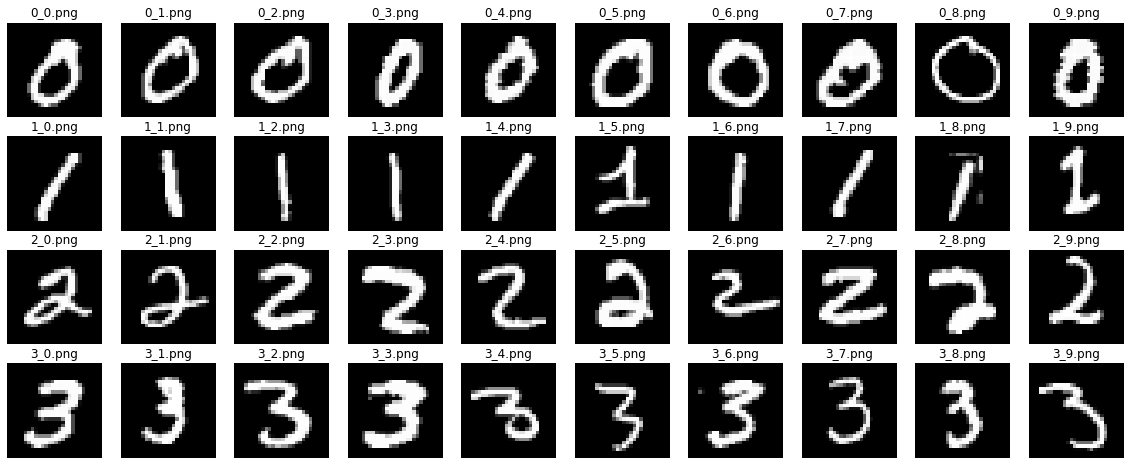

In [24]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.context = 'White'

def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
# Load digits data

# Zero images arrays
zeros_im, zeros_names = load(data_part1, digit='0')
# Ones images arrays
ones_im, ones_names = load(data_part1, digit='1')
# Twos images arrays
twos_im, twos_names = load(data_part2, digit='2')
# Threes images arrays
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(20, 8))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[2], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

---
## Part 1 - contour based descriptors (18 pts)

In this part you will use images of "0"s and "1"s.

**Objectives overview**: Fourier Descriptors


**1)** *Preprocess*: Select ONLY "0" and "1" images and apply suitable preprocessing. Show a plot with the preprocessed data and give arguments on the chosen techniques. (**2 pts**)


**2)** *Get descriptors*: Find the contours and get the Fourier descriptors in complex definition. *Note*: The contours arrays should contain a finite number (N-> self-chosen) of equi-distant points for each image (hint: interpolation). In the case of the "0" contours, just keep the outermost contour. Discuss the necessity of this format. (**4 pts**)
    
    
**3)** *Study effect of descriptors* : Show the contour-reconstruction of the digits using different amount of descriptors (both for ONE "0" image and ONE "1" image)
- Make 5 plots, reconstructing the digits' countours using different amounts of descriptors. (e.g. reconstruct the contour using only the 1st fourier descriptor, reconstruct using the first two fourier descriptors,  using the first three ...)
- **Hint**: check scipy fft, ifft, and fftfreq functions (see [link](https://docs.scipy.org/doc/scipy/tutorial/fft.html)) and pay attention on the ordering, observing which coefficients correspond to positive/negative frequencies of components and how you choose your low frequency subsets . 
- **Extra hint** To reconstruct the contour, copy the original vector of the fourier descriptors, keep the positive and negative frequencies you will use, and set to 0 the rest. (e.g. If you want to reconstruct the image with the first _three fourier descriptors_, keep the first _three positive frequencies_ and their respective _three negative frequencies_ (see positive and negative bin freque
    frequencies [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ). 
- Discuss about your findings. (**4 pts**)
    
        
**4)** *Clustering*: For each image containing a "0" or a "1", using the fourier descriptors, extract a 2-dimensional feature vector (using the THE POSITIVE bin frequencies from fftfreq, see [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ) and plot all of them on a 2D graph. Did you obtain a plot where the vectors of the "0"'s nicely cluster in one part of the plane and those of the "1"'s in the other? If yes, explain why. (**2 pts**)
    
    
**5)** *Show translation, rotation and scale invariance*
- Firstly, discuss which descriptors, or which part of the descriptors are affected by each transformation. For each transformation define (write in words) an operation which will be applied to the descriptor arrays, such that they will be invariant to (not affected by) the specific transformation anymore. After finding the necessary operations, define a function that will make the Fourier descriptors invariant to all the transformations, altogether.(**3 pts**) 
- Secondly, show that if you are using descriptors invariant to transformations, you still obtain 2 nicely defined clusters for the 2 categories of numbers, under transformations applied. (You need to define custom functions for each transformation, apply them on images, and compare the obtained invariant descriptors). Discuss your findings. (**3 pts**)

### 1. Fourier Descriptors

### 1.1. Preprocess and visualization (2 pts)

To preprocess the images, we will apply the following steps:

1. Smooth the images using a Gaussian filter.
2. Binarize the images using Otsu's method.
3. Remove small objects using a morphological opening.

In [37]:
import skimage.filters, skimage.morphology


def preprocess_image(image):
    # Smooth image
    res = skimage.filters.gaussian(image, sigma=1)
    # Binarize image using Otsu's method
    res = res > skimage.filters.threshold_otsu(res)
    # Remove small objects
    res = skimage.morphology.remove_small_objects(res, min_size=5)

    return res

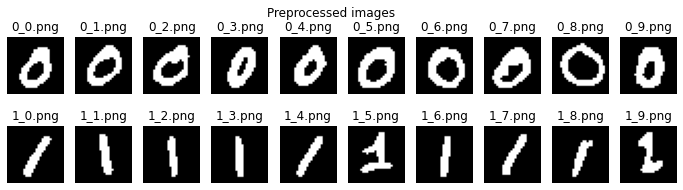

In [41]:
zeros = [preprocess_image(im) for im in zeros_im]
ones = [preprocess_image(im) for im in ones_im]

# Plot images
fig, axes = plt.subplots(2, len(zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

#### Discussion

We noticed that the digit images are from the MNIST dataset, which is a dataset of handwritten digits. The images are 28x28 pixels, and the digits are centered in the image. The background is black, and the digits are white.

Since the MNIST dataset has been already preprocessed to some extent, we have decided to apply only a few preprocessing steps:
- **Gaussian filter**: to smooth the image and remove noise. It is important to remove noise because it can affect the contour detection.
- **Otsu's method**: to binarize the image using the Otsu thresholding method. This method is useful because it is able to detect the threshold value that minimizes the intra-class variance of the thresholded black and white pixels.
- **Morphological opening**: to remove small objects (noise). This step is to make sure that the contours are not affected by small objects.

We have decided to apply these steps because they are the most common preprocessing steps for handwritten digit recognition. We have also tried to apply other preprocessing steps, such as dilation, but they did not improve the results.

### 1.2. Get descriptors (4 pts)

To get the descriptors, we will apply the following steps:
1. Find the contours of the image using the `find_contours` function from `skimage.measure`.
2. Use the outermost contour for "0" digits.
3. Interpolate the contours to obtain a fixed number (N) of equidistant points.
4. Calculate the Fourier descriptors using the `fft` function from `scipy`.

In [39]:
import numpy as np
from skimage.measure import find_contours
from scipy.interpolate import interp1d
from scipy.fft import fft

def interpolate_contour(contour, num_points):
    x = contour[:, 1]
    y = contour[:, 0]
    t = np.linspace(0, 1, len(x))

    fx = interp1d(t, x, kind='cubic', fill_value="extrapolate")
    fy = interp1d(t, y, kind='cubic', fill_value="extrapolate")

    new_t = np.linspace(0, 1, num_points)
    new_x = fx(new_t)
    new_y = fy(new_t)

    return np.column_stack((new_x, new_y))

def get_descriptors(img, num_points=100):
    # Find contours
    contours = find_contours(img, 0.5)

    # Select the outermost contour for "0" digits
    if len(contours) > 1:
        contour = sorted(contours, key=lambda x: -x.shape[0])[0]
    else:
        contour = contours[0]

    # Interpolate the contour to obtain a fixed number of equidistant points
    contour_interp = interpolate_contour(contour, num_points)

    # Calculate the Fourier descriptors
    descriptors = fft(contour_interp[:, 0] + 1j * contour_interp[:, 1])

    return descriptors

# Check first 10 descriptors of a test image (just to check that your pipeline works well)
print(get_descriptors(zeros[0])[:10])

[ 1.39172622e+03+1.50672681e+03j  8.55252147e+00+8.47405703e+02j
 -2.82337937e+01+1.00634520e+01j  6.32235514e+01+2.16566688e+01j
 -1.06128074e+01-1.79170430e+01j  1.69314991e+01+2.66665587e+00j
  1.22645923e+00+6.91619002e+00j  2.07327415e+00-5.87543782e+00j
  7.37999903e+00+5.32678957e-01j  1.87562483e+00+9.74215781e-01j]


#### Discussion

The Fourier descriptors are computed from the interpolated contour points. Interpolation is necessary to ensure that each contour has the same number of points, which is critical for calculating the Fourier descriptors. This is because the Fourier transform assumes that the input signal has a fixed number of points. By using interpolation, we can make a fair comparison between the descriptors of different images.

### 1.3. Study effect of descriptors (6 pts)

In [42]:
# Define increasing set sizes of the descriptors. You can also change these numbers.
descr_set_sizes = [1, 2, 5, 10, 20]

# Define images for which you will show the recovery. You can also change the indexes.
zero = zeros_im[0]
one = ones_im[0]

In [43]:
from scipy.fft import ifft


def reconstruct_contour(descriptors, num_descriptors):
    # Make a copy of the descriptors
    modified_descriptors = np.copy(descriptors)
    # Keep the specified number of positive and negative frequencies and set the rest to 0
    modified_descriptors[num_descriptors + 1: -num_descriptors] = 0
    # Perform inverse Fourier transform
    contour_reconstructed = ifft(modified_descriptors)

    return contour_reconstructed.real, contour_reconstructed.imag

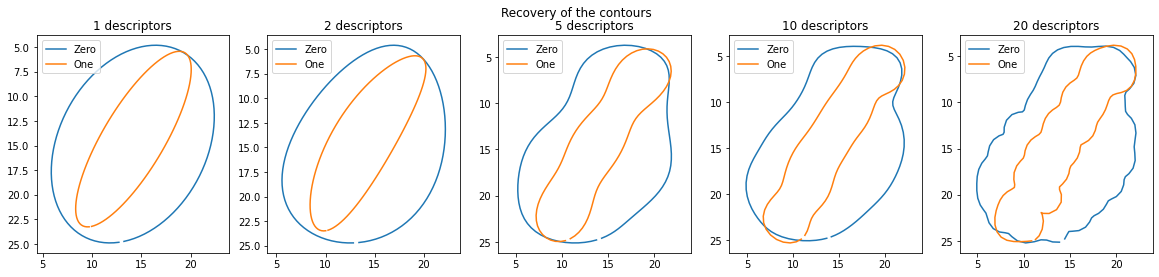

In [44]:
# Plot recovery for a zero image and a one image
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

zero_descriptors = get_descriptors(zero)
one_descriptors = get_descriptors(one)

for i, num_descriptors in enumerate(descr_set_sizes):
    # Reconstruct contours for zero and one images
    zero_x, zero_y = reconstruct_contour(zero_descriptors, num_descriptors)
    one_x, one_y = reconstruct_contour(one_descriptors, num_descriptors)

    # Plot reconstructed contours
    axes[i].plot(zero_x, zero_y, label='Zero')
    axes[i].plot(one_x, one_y, label='One')
    axes[i].set_title(f"{num_descriptors} descriptors")
    axes[i].invert_yaxis()
    axes[i].axis("equal")
    axes[i].legend()

fig.suptitle("Recovery of the contours")
plt.show()

#### Discussion

The plots show the recovery of the contours of a "0" and a "1" image using different numbers of Fourier descriptors. As the number of descriptors increases, the reconstructed contours become more accurate and resemble the original shapes more closely.

With only 1 or 2 descriptors, the contours are not well reconstructed, and the shapes are barely recognizable. However, as we increase the number of descriptors to 5, the shapes start to become more recognizable. With 10 descriptors, the shapes become even more accurate, and the contours are quite close to the original ones. With 20 descriptors, the contours are almost perfectly reconstructed.

The results show that the Fourier descriptors can capture the shape of the contours effectively, and increasing the number of descriptors improves the accuracy of the reconstruction. However, we think that in many practical applications, a moderate number of descriptors (e.g., 10) is sufficient to capture the main characteristics of the shape, and using more descriptors may not provide significant improvements in accuracy but can increase computational complexity.

### 1.4 Clustering (2 pts)

In [45]:
def extract_features(descriptors):
    # Use the 1st and 2nd positive Fourier descriptors
    return np.abs(descriptors[1]), np.abs(descriptors[2])

# Compute the features for all "0"s and "1"s
zeros_features = np.array([extract_features(get_descriptors(img)) for img in zeros])
ones_features = np.array([extract_features(get_descriptors(img)) for img in ones])


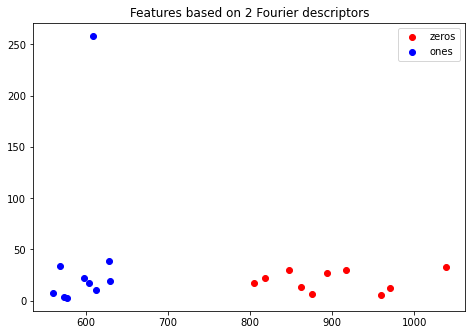

In [46]:
# TODO: You should fill the lists below, with your features

# First feature for all "0"s
zeros_f1 = zeros_features[:, 0]
# Second feature for all "0"s
zeros_f2 = zeros_features[:, 1]
# First feature for all "1"s
ones_f1 = ones_features[:, 0]
# Second feature for all "1"s
ones_f2 = ones_features[:, 1]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Features based on 2 Fourier descriptors")
plt.show()

#### Discussion


The plot shows that the features based on the 1st and 2nd positive Fourier descriptors can successfully separate the "0"s and "1"s into distinct clusters. This indicates that the chosen Fourier descriptors effectively capture the main differences between the shapes of these digits. The 1st and 2nd Fourier descriptors represent the primary shape information and contour details of the digits, which is why they are useful for distinguishing between "0" and "1".

The success of the clustering can be attributed to the fact that "0" and "1" have different shapes and contours, which are well represented by the selected Fourier descriptors. For example, "0" has a circular shape with a hole in the center, while "1" has a simple linear shape. The 1st and 2nd positive Fourier descriptors capture these differences, allowing the clustering algorithm to effectively separate the two groups of digits.

### 1.5 Transformation invariance (6 pts)

#### Preliminary discussion

To make the features invariant to different transformations, we need to normalize the Fourier descriptors as follows:

1. **Translation invariance**: We can achieve translation invariance by removing the zero-frequency component (DC component) of the Fourier descriptors, which corresponds to setting the first Fourier descriptor to 0.
2. **Rotation invariance**: We can achieve rotation invariance by dividing all Fourier descriptors by the phase of the first non-zero Fourier descriptor, which corresponds to normalizing the angle of the first non-zero Fourier descriptor to 0.
3. **Scale invariance**: We can achieve scale invariance by dividing all Fourier descriptors by the magnitude of the first non-zero Fourier descriptor, which corresponds to normalizing the magnitude of the first non-zero Fourier descriptor to 1.

#### Implementation

In [47]:
def get_invariant_features(img, inv_to_rotation=False, inv_to_translation=False, inv_to_scale=False):
    descriptors = get_descriptors(img)
    if inv_to_translation:
        descriptors[0] = 0
    if inv_to_rotation or inv_to_scale:
        first_non_zero_descriptor = next(x for x in descriptors if x != 0)
        if inv_to_rotation:
            descriptors /= np.angle(first_non_zero_descriptor)
        if inv_to_scale:
            descriptors /= np.abs(first_non_zero_descriptor)
    return extract_features(descriptors)

In [48]:
# Define custom rotation function. You may add other parameters to the function.
def random_rotate(img):
    angle = np.random.uniform(0, 360)
    return skimage.transform.rotate(img, angle, mode='edge')

# Define custom rotation function. You may add other parameters to the function.
def random_translate(img):
    shift_x = np.random.randint(-10, 11)
    shift_y = np.random.randint(-10, 11)
    return np.roll(np.roll(img, shift_x, axis=0), shift_y, axis=1)
    
# Define custom rotation function. You may add other parameters to the function.
def random_scale(img):
    scale_factor = np.random.uniform(0.5, 2)
    scaled_img = skimage.transform.rescale(img, scale_factor, mode='edge', anti_aliasing=True)
    return skimage.transform.resize(scaled_img, img.shape, mode='edge', anti_aliasing=True)

In [49]:
# We will define 4 sets of new images below
rotated_images_zeros = [random_rotate(img) for img in zeros_im]
rotated_images_ones = [random_rotate(img) for img in ones_im]

translated_images_zeros = [random_translate(img) for img in zeros_im]
translated_images_ones = [random_translate(img) for img in ones_im]

scaled_images_zeros = [random_scale(img) for img in zeros_im]
scaled_images_ones = [random_scale(img) for img in ones_im]

transformed_images_zeros = [random_scale(random_translate(random_rotate(img))) for img in zeros_im]
transformed_images_ones = [random_scale(random_translate(random_rotate(img))) for img in ones_im]

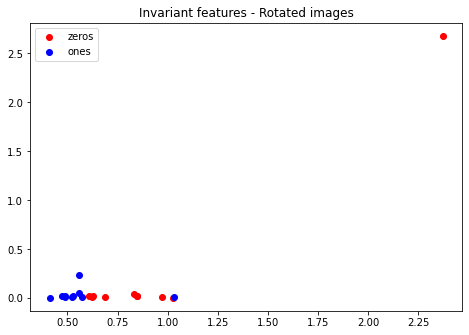

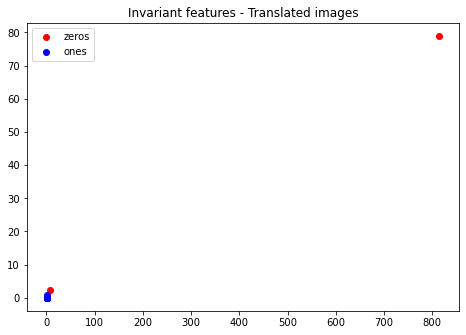

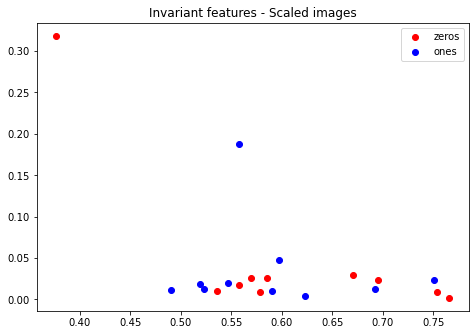

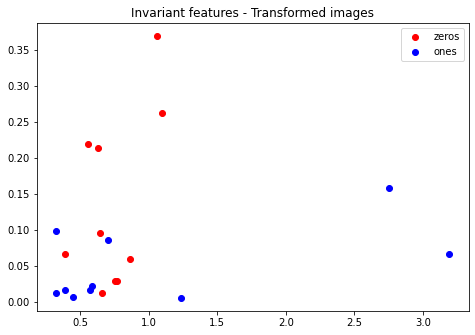

In [50]:
# For each of the 4 sets of "0"s and "1"s above, you should find the invaiant features
# and make a plot (similar to section 1.4) - 4 plots in total!
# Use a proper labeling/legend for the plots!


def plot_invariant_features(images_zeros, images_ones, inv_to_rotation, inv_to_translation, inv_to_scale, title):
    zeros_features = [get_invariant_features(img, inv_to_rotation, inv_to_translation, inv_to_scale) for img in images_zeros]
    ones_features = [get_invariant_features(img, inv_to_rotation, inv_to_translation, inv_to_scale) for img in images_ones]
    zeros_f1, zeros_f2 = zip(*zeros_features)
    ones_f1, ones_f2 = zip(*ones_features)

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
    ax.scatter(ones_f1, ones_f2, color='b', label='ones')
    ax.legend(loc='best')
    plt.title(title)
    plt.show()

plot_invariant_features(rotated_images_zeros, rotated_images_ones, True, True, True, "Invariant features - Rotated images")
plot_invariant_features(translated_images_zeros, translated_images_ones, True, True, True, "Invariant features - Translated images")
plot_invariant_features(scaled_images_zeros, scaled_images_ones, True, True, True, "Invariant features - Scaled images")
plot_invariant_features(transformed_images_zeros, transformed_images_ones, True, True, True, "Invariant features - Transformed images")

#### Discussion

But I think the results are so bad... Why?

`TODO: check the above functions and the results`

## PART 2 - region based descriptors (10 pts)

In this part, you will use the "2"s and "3"s images.

**Objectives overview**:

**1)** *Cluster on compacity*: Based on custom definitions of perimeter and area for each image of "2" and "3" (preprocessed - by you), make a 2D plot with 2-dimensional feature vectors, similar to section 1.4. After that, define the compacity feature for each "2"s and "3"s image. Are you still able to obtain a 1D plot with values clustered in 2 well-defined regions? Discuss your findings. (**6 pts**).

**2)** *Additional method*: Choose one more region-based method (from the course or your own sources - internet allowed) and redo the 1D plot in section 2.1 (or 2D plot, depending on your choosing). Explain your method and your findings. (**4 pts**)

### 2.3. Cluster on compacity (6 pts)

In [ ]:
# TODO

In [ ]:
# TODO: Fill the arrays below with the perimeter and area as features for "2"s and "3"s images
twos_f1 = []
twos_f2 = []
threes_f1 = []
threes_f2 = []

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_f1, twos_f2, color='r', label='twos')
ax.scatter(threes_f1, threes_f2, color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on perimeter and area")
plt.show()

In [ ]:
# TODO: Make the 1D plot of the compacity

####  Discussion

TODO

### 2.2. Additional method (4 pts)

In [ ]:
# TODO

#### Discussion

TODO